<a href="https://colab.research.google.com/github/superobloxcy/k-maper/blob/code-edits/eyespy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import quaternion
import time

In [ ]:
time.time()

1758445356.6001916


In [ ]:
!pip install -e "git+https://github.com/openskynetwork/opensky-api.git#egg=opensky-api&subdirectory=python"
!pip install numpy-quaternion

ERROR: Operation cancelled by user


opensky integration

In [ ]:
from opensky_api import OpenSkyApi
api = OpenSkyApi()
#track = api.get_track_by_aircraft("7c19c8")
#print(track)
states = api.get_states(icao24="7c02d2")
for s in states.states:
    print("(%r, %r, %r, %r, %r, %r, %r, %r)" % (s.icao24, s.longitude, s.latitude, s.geo_altitude, s.velocity, s.vertical_rate, s.true_track, time.time()-s.time_position))
print(f'The geodedic altitude is {s.geo_altitude}m')

('7c02d2', 153.3618, -27.9739, 1097.28, 61.66, -3.9, 197.98, 1.4523165225982666)
The geodedic altitude is 1097.28m


In [ ]:
print(s.geo_altitude)

1097.28


functions

In [ ]:
def llhtxyz(lat,lon,height=0):
  lat=np.deg2rad(lat)
  lon=np.deg2rad(lon)
  a=6378137
  b=6356752.314245
  e2=1-((b*b)/(a*a))
  #change all to deg2rad
  Nphi = a/(np.sqrt(1-(e2*((np.sin(lat)**2)))))
  X=((Nphi+height)*np.cos(lat)*np.cos(lon))
  Y=((Nphi+height)*np.cos(lat)*np.sin(lon))
  Z=((Nphi*(1-e2))+height)*np.sin(lat)
  return np.array([X,Y,Z])
#diff=(llhtxyz(-27.988059,153.322960,27)-llhtxyz(-27.988059,153.322960,100))
#print(diff)
#print(math.sqrt((diff[0]**2)+(diff[1]**2)+(diff[2]**2)))



In [ ]:
def globaltolocal(x,y,z):
  lat= np.arctan(np.sqrt((x**2)+(y**2))/z)
  lon= np.arctan(y/x)
  Global=[x,y,z]
  q_theta= [np.cos(lat/2),0,0,sin(lat/2)]
  q_phi= [np.cos(lon/2),0,sin(lon/2),0]

  quaterion=q_theta*q_phi
  inv_quaterion= np.negative(quaterion)
  inv_quaterion[0]=-inv_quaterion[0]

  local=inv_quaterion*(Global-home)*quaterion
  return local



In [ ]:
dif=(llhtxyz(-28.217,152.582,7886)-llhtxyz(-27.988059,153.322960,27))
print(dif)

def localtoazal([x,y,z]):
  di=local

  az=np.rad2deg(np.arctan(di[0]/di[1]))
  al=np.rad2deg(np.arctan(di[1]/di[2]))
  print(az,al)
  r=math.sqrt((di[0]**2)+(di[1]**2)+(di[2]**2))
  print(r)
  d_i=np.array([(di[0]/r),(di[1]/r),(di[2]/r)])
  u=np.sqrt((d_i[0]**2)+(d_i[1]**2)+(d_i[2]**2))
  print(u)

  return az,al

print()

[ 37606.89090717  62603.5571268  -26096.26126476]
30.993866140311628 -67.37120986771752
77553.19761705892
1.0



quaternions

In [ ]:

Homeq=np.quaternion(0,Home[0],Home[1],Home[2])
Aircraftq=np.quaternion(0,Aircraft[0],Aircraft[1],Aircraft[2])

theta = np.deg2rad(150)
phi= np.deg2rad(-28)

q_theta=np.quaternion(np.cos(theta/2),0,0,np.sin(theta/2))
q_phi=np.quaternion(np.cos(phi/2),0,np.sin(phi/2),0)

qtp=np.array([q_theta,q_phi])

q=np.multiply(q_theta,q_phi)
qcon=q.conj()
print(q)
print(qcon)

A_local=np.multiply(qcon,A-Home)
A_local=np.multiply(A_local,q)
print(A_local)

In [ ]:
#global.Home=llhtxyz(-27.988059,153.322960,27)

testing

In [ ]:
aircraft_location=llhtxyz(s.latitude,s.longitude,s.geo_altitude)
print(aircraft_location)

[-5039598.73760352  2527847.00313879 -2974465.84662894]


In [ ]:
diff=(llhtxyz(-27.988059,153.322960,45)-llhtxyz(-27.988059,153.322960,27))
print(diff)
print(math.sqrt((diff[0]**2)+(diff[1]**2)+(diff[2]**2)))

[-14.20283596   7.13615258  -8.44717568]
18.000000000018066


In [ ]:
dif=(llhtxyz(-27.988065,153.322960,27)-llhtxyz(-27.988059,153.322960,27))
print(dif)
print(math.sqrt((dif[0]**2)+(dif[1]**2)+(dif[2]**2)))

[ 0.27882193 -0.14009285 -0.58715311]
0.6649183765375903


In [ ]:
di=(llhtxyz(-28.217,152.582,7886)-llhtxyz(-27.988059,153.322960,27))


az=np.arctan(di[0]/di[1])
al=np.arctan(di[1]/di[2])

Raz=np.array([[np.cos(az),-np.sin(az),0],[np.sin(az),np.cos(az),0],[0,0,1]])
Ral=np.array([[np.cos(al),0,np.sin(al)],[0,1,0],[-np.sin(al),0,np.cos(al)]])

#quaterion method


Tracking and deadreckoning

In [ ]:
Aircraft_heading=300
vertical_rate=

#(x,y,z) using bearing, and vertical rate and ground velocity to get descent angle
#we can make a vector direction for it where we can give a time interval,
#to evauate distance from the magnitude of the velocities



In [ ]:
#startup do a full rotation, when microswitch 0 triggered, set degrees to 0
#when microswitch 1 triggered, check degrees is 120
#when 2 triggered, check 240

if ms1 == 1:
  errorD=120-Serial.print(az.Degrees)


IMU and references

In [ ]:
#9DOF, 3 magneto, 3 accelerometer, 3 gyro, maybe not used

#gps module, get 12 gps locations over 1 minute and average them to get an accurate location
for t inrange 12:
  gpsA = (gpsA+Serial.print(gpsdata))
  wait(5)
gps=gpsA/12
#from world magnetic model declinations

field_componants=WMM(gps,date)
declination=field_componants['declination']

#get magnetic north bearing from magneto
bearing = atan(magneto.y/magneto.x)
#apply declination correction
tnb=bearing+declination
#this true north bearing will be applied on every azimuth

In [ ]:
diff=(llhtxyz(-28.00266436,153.32811491,27))
print(diff)
print(math.sqrt((diff[0]**2)+(diff[1]**2)+(diff[2]**2)))

[-5035930.296866    2529713.63196155 -2976778.65267626]
6373480.694381525


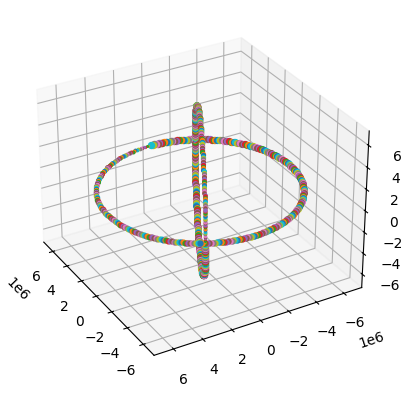

In [ ]:
#n=np.linspace(0,100,100)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for n in range(360):
  ar=llhtxyz(n,153,27)
  x,y,z=ar.T
  #print(x,y,z)
  ax.scatter(x,y,z,s=np.sqrt(n))
for n in range(360):
  ar=llhtxyz(0,n,27)
  x,y,z=ar.T
  #print(x,y,z)
  ax.scatter(x,y,z,s=np.sqrt(n))
ax.view_init(30, 150)
plt.show()
#print(ar)


In [ ]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Data for latitude loop
lats = np.arange(300)
lon_const = 180
height_const = 0

x_lat = []
y_lat = []
z_lat = []
for n in lats:
  ar = llhtxyz(n, lon_const, height_const)
  x_lat.append(ar[0])
  y_lat.append(ar[1])
  z_lat.append(ar[2])

fig.add_trace(go.Scatter3d(
    x=x_lat,
    y=y_lat,
    z=z_lat,
    mode='markers',
    marker=dict(
        size=3,
        color=lats,
        colorscale='Viridis',
        opacity=0.8
    ),
    name='Latitude Loop'
))

# Data for longitude loop
lat_const = 0
lons = np.arange(300)

x_lon = []
y_lon = []
z_lon = []
for n in lons:
  ar = llhtxyz(lat_const, n, height_const)
  x_lon.append(ar[0])
  y_lon.append(ar[1])
  z_lon.append(ar[2])

fig.add_trace(go.Scatter3d(
    x=x_lon,
    y=y_lon,
    z=z_lon,
    mode='markers',
    marker=dict(
        size=3,
        color=lons,
        colorscale='Plasma',
        opacity=0.8
    ),
    name='Longitude Loop'
))

fig.update_layout(
    title='Interactive 3D Plot of llhtxyz function',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()